# Sales Data Analysis

In [1]:
import pandas as pd
import os

## Merging the 12 months data in to one file

## read files located in sales directory
use os.listdir method to read data in dir

In [12]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
# using list comprehension to access all the files located in the directory
files = [file for file in os.listdir('Sales_Data')]

# create an empty dataframe to store all months data 
all_month_data = pd.DataFrame()


for file in files:
    df= pd.read_csv('Sales_Data/'+file)
#     concatinating each file month data 
    all_month_data = pd.concat([all_month_data ,df])
    
all_month_data.to_csv('all_data.csv',index= False)

## read all data in updated dataframe

In [10]:
all_data = pd.read_csv('all_data.csv')
all_data.head()
# all_data.info()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


 ## Clean up data

#### Drop NaN rows

In [11]:
all_data.head()

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


#### find 'Or' and delete it

In [17]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


#### checking the data types of columns

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### convert columns to correct data types

In [25]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # madee itn
all_data['Price Each']= pd.to_numeric(all_data['Price Each']) # made float

## Question 1.What is the best month for sales? How  much was earned ?

## Augument data with addional columns

### Add month column

In [6]:
all_data['Month']= 3
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",3
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",3
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",3
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",3
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",3


In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


#### Add sales column 

In [27]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


#### Add city column for q2

In [44]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x : get_city(x) + ',' + get_state(x) )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY"


## Q1 Ans .What is the best month for sales? How  much was earned  that month?

In [36]:
results= all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


## visualize the data

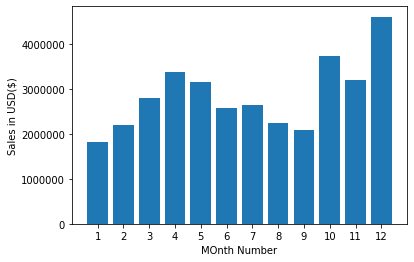

In [39]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('MOnth Number')
plt.ylabel('Sales in USD($)')
plt.show()

We see that December has most number of sales

## Q 2. Which city has the highest number of sales ?

In [45]:
city_result = all_data.groupby('City').sum()
city_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2.779908e+06,104794,2.795499e+06
"Austin,TX",11153,1.809874e+06,69829,1.819582e+06
"Boston,MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas,TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,208325,5.452571e+06
"New York City,NY",27932,4.635371e+06,175741,4.664317e+06
"Portland,ME",2750,4.471893e+05,17144,4.497583e+05
"Portland,OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco,CA",50239,8.211462e+06,315520,8.262204e+06


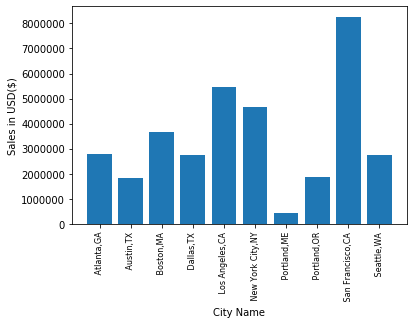

In [47]:
cities = [city for city , df in all_data.groupby('City')]

plt.bar(cities, city_result['Sales'])
plt.xticks(cities, rotation = 'vertical',size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD($)')
plt.show()

## Q3 What time should we advertise to maximize likelihood of customer's buying product ?

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY"


In [53]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR"


#### getting hours and minutes of order

In [55]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR",14,40


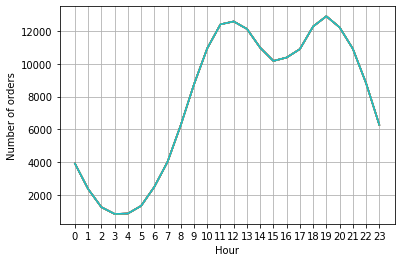

In [57]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours ,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.show()


It shows that it wouuld be better to show ads at around 7 pm or 11 am , as the order is max at this time

## Q4. What products are more often sold together ?

In [58]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR",14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA",20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY",19,53


 ### I think it would be better to look at the products that are sold during the same order id ...
 
 ## use Shift + tab to ket the documentation of the function 

In [59]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,"San Francisco,CA",20,12
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,"San Francisco,CA",20,12
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,"San Francisco,CA",9,28
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,"San Francisco,CA",9,28
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,"New York City,NY",10,17
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,11.99,"New York City,NY",10,17
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,600.00,"San Francisco,CA",12,38
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,11.99,"San Francisco,CA",12,38
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,400.00,"Los Angeles,CA",8,51
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,11.95,"Los Angeles,CA",8,51


In [62]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head()

/home/poudell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,"San Francisco,CA",20,12,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,"San Francisco,CA",20,12,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,"San Francisco,CA",9,28,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,"San Francisco,CA",9,28,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,"New York City,NY",10,17,"Google Phone,Wired Headphones"


In [64]:
# As there are duplicate rows we remove them
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [69]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### we see that iphone and lighting charging cable are bought together

## What product sold the most ? why do you think so ?

In [70]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR",14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA",20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY",19,53


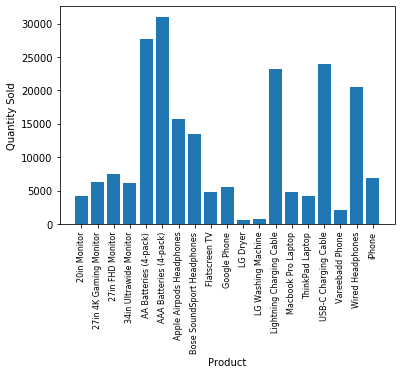

In [74]:
product_group= all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(products, rotation='vertical',size=8)
plt.show()


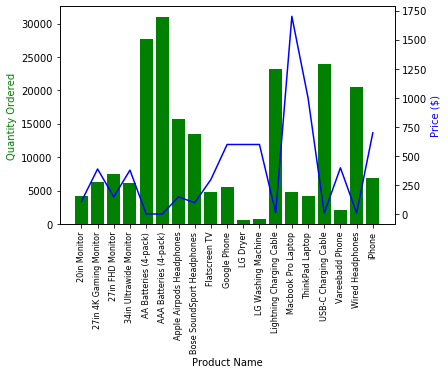

In [82]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation = 'vertical',size=8)
plt.show()

### Here  we could say that as the price of batteries pack is low and they are bought together ...with other products similary we can say that the price of Macbook pro laptop is high it is compaatively bought in less quantity.